<a href="https://colab.research.google.com/github/MPrasanna14/prasanna_INFO5731_Fall2023/blob/main/PrasannaMalreddy_In_class_exercise_04_03282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 re

In [5]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()


import re
import numpy as np
import string

nltk.download('punkt')
nltk.download('stopwords')

# Sample article text
article_text = """
In recent years, the global conversation surrounding sustainability has intensified, with a growing emphasis on reducing our carbon footprint. The transportation sector, known for its significant contribution to pollution, has seen a surge in the adoption of sustainable mobility solutions. Among these, electric buses, car sharing, and micro-mobility have emerged as key players in reshaping the way we navigate urban landscapes.

Electric Buses: The Backbone of Eco-Friendly Public Transportation

In bustling cities, the hum of traditional buses has been gradually replaced by the whisper of electric buses. These vehicles represent a fundamental shift in public transportation, offering an environmentally friendly alternative to their gas-guzzling counterparts. Electric buses run on rechargeable batteries, emitting zero tailpipe emissions, and reducing noise pollution, making them a promising solution for tackling air quality issues in densely populated areas.

The integration of electric buses into public transportation networks has yielded remarkable results. Not only do they contribute to cleaner air, but they also provide a smoother and quieter ride for passengers. Moreover, with advancements in battery technology, the range and efficiency of electric buses have improved significantly, addressing concerns regarding their operational capabilities and potential limitations.

Car sharing: Driving Towards a Sustainable Future

As urban populations continue to swell, the demand for convenient and cost-effective transportation options has led to the rise of car sharing services. Car sharing programs enable individuals to access vehicles on an as-needed basis, eliminating the need for personal car ownership. By encouraging resource-sharing and reducing the number of cars on the road, these initiatives play a vital role in promoting sustainable mobility.

The benefits of car sharing extend beyond environmental conservation. They include reduced traffic congestion, minimized parking space requirements, and lower overall transportation costs for users. Furthermore, the incorporation of electric or hybrid vehicles within car sharing fleets has further bolstered the sustainability quotient, offering users an eco-friendly alternative for their transportation needs.

Micro-Mobility: Redefining Short-Distance Travel

In bustling city centers, the streets have witnessed the emergence of a new mode of transportation – micro-mobility. This term encompasses various compact and lightweight modes of transport such as electric scooters, bicycles, and even electric skateboards. Designed for short-distance travel, these alternatives provide a convenient and eco-conscious solution for navigating congested urban areas.

The rising popularity of micro-mobility options can be attributed to their accessibility, flexibility, and user-friendly nature. These alternatives provide an effective means of traversing short distances, lessening the dependence on traditional transportation methods for daily commutes. Moreover, their eco-friendly nature resonates with the increasing focus on curbing carbon emissions and fostering sustainable development in urban areas.

The Role of Infrastructure and Policy in Promoting Sustainable Mobility

The effectiveness of sustainable mobility solutions heavily relies on the existence of supportive infrastructure and conducive policies. While the proliferation of these solutions is a positive step, their success is contingent on the presence of appropriate infrastructure and well-designed policies. Developing charging infrastructure for electric buses and vehicles, along with the implementation of dedicated lanes and parking spaces, is vital in promoting the widespread adoption of eco-friendly transportation options.

Furthermore, policy initiatives aimed at incentivizing the use of sustainable mobility solutions, such as tax benefits for electric vehicle users and the integration of car sharing services into urban planning strategies, can significantly influence consumer behavior and encourage the transition towards more sustainable transportation practices.

Challenges and Opportunities on the Horizon

Despite the evident benefits of sustainable mobility solutions, several challenges persist in their widespread implementation. These challenges include the initial costs associated with infrastructure development, the need for continued technological advancements to enhance the efficiency of electric vehicles, and the requirement for comprehensive regulatory frameworks to govern the operations of car sharing and micro-mobility services.

However, these challenges also present an opportunity for innovation and collaboration within the public and private sectors. Investments in research and development, coupled with strategic partnerships between governments, businesses, and communities, can pave the way for the seamless integration of sustainable mobility solutions into the fabric of urban life.

A Sustainable Future in Motion

In an era where the impacts of climate change and environmental decline loom large, the importance of sustainable mobility solutions becomes ever more evident. Embracing the capabilities of electric buses, car sharing, and micro-mobility can enable cities to cultivate a transportation ecosystem that is not only cleaner and more efficient but also more inclusive, benefiting both the environment and the people who inhabit it.

The journey towards sustainable mobility requires a collective effort, with stakeholders across various sectors playing a pivotal role in driving positive change. Through continued innovation, investment, and advocacy, we can pave the way for a future where mobility is not only efficient and accessible but also sustainable and environmentally conscious. Together, we can steer our cities toward a more sustainable and vibrant tomorrow.

Empowering Communities through Education and Engagement

Fostering community empowerment through education and engagement forms the cornerstone of successful sustainable mobility solutions. Educational programs and awareness campaigns are instrumental in cultivating a culture of sustainability, encouraging individuals to make informed choices about their transportation habits. By highlighting the benefits of environmentally friendly alternatives and showcasing their positive impact on the environment, communities can be inspired to actively participate in the transition towards sustainable mobility.

Moreover, community engagement initiatives can serve as a platform for gathering valuable feedback and insights from residents, enabling policymakers and transportation authorities to tailor their strategies and solutions according to the specific needs and preferences of the local populace. By incorporating community input into the planning and development of sustainable mobility projects, cities can ensure that their efforts are not only effective but also inclusive and community-centric.

Looking Ahead: The Evolution of Sustainable Mobility

As technology continues to advance and societal awareness of environmental issues grows, the landscape of sustainable mobility is poised for further evolution. Continued research and development in the fields of electric vehicle technology, battery efficiency, and renewable energy sources are expected to drive significant improvements in the performance and accessibility of sustainable transportation options.

Furthermore, the integration of smart technologies and data-driven solutions holds the potential to optimize the efficiency of public transportation networks, enhance the user experience of car sharing services, and streamline the operations of micro-mobility initiatives. By leveraging the power of data and analytics, cities can make data-driven decisions that lead to more effective and sustainable mobility solutions, ultimately contributing to a cleaner and more resilient urban environment.

In the face of global challenges such as climate change and urbanization, the pursuit of sustainable mobility solutions remains imperative for building a more sustainable and resilient future. By embracing innovation, fostering collaboration, and prioritizing the needs of communities, cities can pave the way for a more sustainable and equitable transportation landscape, where the well-being of both the planet and its inhabitants is placed at the forefront of urban development."""

lda_model= None
# Preprocess the text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Tokenize and preprocess the text
tokens = preprocess_text(article_text)
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# Calculate coherence scores for different numbers of topics
def calculate_coherence_scores(corpus, dictionary, texts, limit, start=2, step=1):
    coherence_scores = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherencemodel.get_coherence()
        coherence_scores.append((num_topics, coherence_score))
        print(f'Coherence Score for {num_topics} topics: {coherence_score:.4f}')
    return coherence_scores

# Main function
def main():
    limit = 10
    global lda_model
    coherence_scores = calculate_coherence_scores(corpus, dictionary, [tokens], limit=limit, start=2, step=1)
    optimal_num_topics, _ = max(coherence_scores, key=lambda x: x[1])
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics)
    topics = lda_model.show_topics(formatted=False)

    print(f'Optimal number of topics: {optimal_num_topics}')

    for topic_id, topic in topics:
        words = [word for word, weight in topic]
        top_words = ", ".join([f"{word} ({weight:.4f})" for word, weight in topic])
        print(f'Topic {topic_id + 1}: {top_words}')

if __name__ == "__main__":
    main()


vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score for 2 topics: 0.3484


Coherence Score for 3 topics: 0.3514


Coherence Score for 4 topics: 0.3295


Coherence Score for 5 topics: 0.3186


Coherence Score for 6 topics: 0.3328


Coherence Score for 7 topics: 0.3669


Coherence Score for 8 topics: 0.3279


Coherence Score for 9 topics: 0.3337
Optimal number of topics: 7
Topic 1: sustainable (0.0184), transportation (0.0143), mobility (0.0119), solutions (0.0112), sharing (0.0104), electric (0.0096), buses (0.0096), urban (0.0085), car (0.0082), micromobility (0.0066)
Topic 2: sustainable (0.0191), mobility (0.0183), transportation (0.0144), electric (0.0139), car (0.0122), sharing (0.0094), solutions (0.0093), urban (0.0078), micromobility (0.0076), cities (0.0072)
Topic 3: sustainable (0.0213), mobility (0.0151), transportation (0.0143), electric (0.0118), solutions (0.0115), buses (0.0102), car (0.0100), sharing (0.0081), development (0.0071), urban (0.0070)
Topic 4: sustainable (0.0126), electric (0.0099), transportation (0.0092), solutions (0.0075), mobility (0.0073), buses (0.0067), sharing (0.0067), car (0.0055), development (0.0054), urban (0.0054)
Topic 5: sustainable (0.0339), transportation (0.0224), mobility (0.0206), electric (0.0177), solutions (0.0157), car (0.0141), sharin

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score for 2 topics: 0.3115
Coherence Score for 3 topics: 0.3229


Coherence Score for 4 topics: 0.3407
Coherence Score for 5 topics: 0.3292
Coherence Score for 6 topics: 0.3432


Coherence Score for 7 topics: 0.3371
Coherence Score for 8 topics: 0.3353
Coherence Score for 9 topics: 0.3557

Coherence Score (LSA):  0.3318181331509592


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.30470007259654264

Coherence Score (LSA):  0.30470007259654264


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.30470007259654264

Coherence Score (LSA):  0.30470007259654264


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.2975727657677375

Coherence Score (LSA):  0.35127058300010117


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.33247579208174727
Optimal number of topics: 9
Topic 1: sustainable (0.4486), mobility (0.3050), transportation (0.3050), electric (0.2512), solutions (0.2153), car (0.1974), sharing (0.1794), buses (0.1615), urban (0.1435), micromobility (0.1256)
Optimal number of topics (LSA): 8
Topics (LSA):
Topic (LSA) 1: sustainable, mobility, transportation, electric, solutions, car, sharing, buses, urban, micromobility

Coherence Score (LSA):  0.3219934781895585


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.3045428751829489

Coherence Score (LSA):  0.3527109744987218


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.3563388682227829

Coherence Score (LSA):  0.34124454078167776


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.33130556529131083

Coherence Score (LSA):  0.34460108499813136


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.3047000725965426

Coherence Score (LSA):  0.3286796791711287


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LSA):  0.33634560484841874


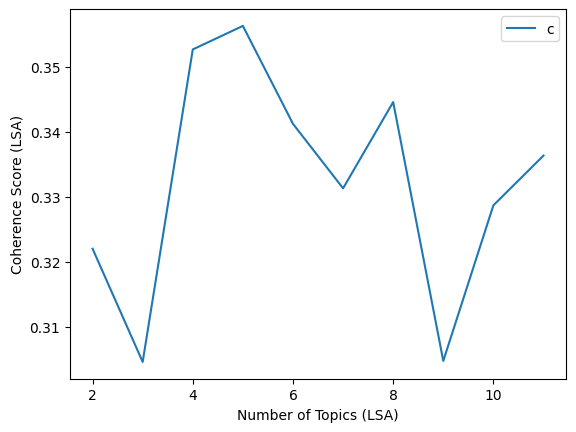

In [21]:
# Write your code here
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()


import re
import numpy as np
import string

nltk.download('punkt')
nltk.download('stopwords')


article_text = """
In recent years, the global conversation surrounding sustainability has intensified, with a growing emphasis on reducing our carbon footprint. The transportation sector, known for its significant contribution to pollution, has seen a surge in the adoption of sustainable mobility solutions. Among these, electric buses, car sharing, and micro-mobility have emerged as key players in reshaping the way we navigate urban landscapes.

Electric Buses: The Backbone of Eco-Friendly Public Transportation

In bustling cities, the hum of traditional buses has been gradually replaced by the whisper of electric buses. These vehicles represent a fundamental shift in public transportation, offering an environmentally friendly alternative to their gas-guzzling counterparts. Electric buses run on rechargeable batteries, emitting zero tailpipe emissions, and reducing noise pollution, making them a promising solution for tackling air quality issues in densely populated areas.

The integration of electric buses into public transportation networks has yielded remarkable results. Not only do they contribute to cleaner air, but they also provide a smoother and quieter ride for passengers. Moreover, with advancements in battery technology, the range and efficiency of electric buses have improved significantly, addressing concerns regarding their operational capabilities and potential limitations.

Car sharing: Driving Towards a Sustainable Future

As urban populations continue to swell, the demand for convenient and cost-effective transportation options has led to the rise of car sharing services. Car sharing programs enable individuals to access vehicles on an as-needed basis, eliminating the need for personal car ownership. By encouraging resource-sharing and reducing the number of cars on the road, these initiatives play a vital role in promoting sustainable mobility.

The benefits of car sharing extend beyond environmental conservation. They include reduced traffic congestion, minimized parking space requirements, and lower overall transportation costs for users. Furthermore, the incorporation of electric or hybrid vehicles within car sharing fleets has further bolstered the sustainability quotient, offering users an eco-friendly alternative for their transportation needs.

Micro-Mobility: Redefining Short-Distance Travel

In bustling city centers, the streets have witnessed the emergence of a new mode of transportation – micro-mobility. This term encompasses various compact and lightweight modes of transport such as electric scooters, bicycles, and even electric skateboards. Designed for short-distance travel, these alternatives provide a convenient and eco-conscious solution for navigating congested urban areas.

The rising popularity of micro-mobility options can be attributed to their accessibility, flexibility, and user-friendly nature. These alternatives provide an effective means of traversing short distances, lessening the dependence on traditional transportation methods for daily commutes. Moreover, their eco-friendly nature resonates with the increasing focus on curbing carbon emissions and fostering sustainable development in urban areas.

The Role of Infrastructure and Policy in Promoting Sustainable Mobility

The effectiveness of sustainable mobility solutions heavily relies on the existence of supportive infrastructure and conducive policies. While the proliferation of these solutions is a positive step, their success is contingent on the presence of appropriate infrastructure and well-designed policies. Developing charging infrastructure for electric buses and vehicles, along with the implementation of dedicated lanes and parking spaces, is vital in promoting the widespread adoption of eco-friendly transportation options.

Furthermore, policy initiatives aimed at incentivizing the use of sustainable mobility solutions, such as tax benefits for electric vehicle users and the integration of car sharing services into urban planning strategies, can significantly influence consumer behavior and encourage the transition towards more sustainable transportation practices.

Challenges and Opportunities on the Horizon

Despite the evident benefits of sustainable mobility solutions, several challenges persist in their widespread implementation. These challenges include the initial costs associated with infrastructure development, the need for continued technological advancements to enhance the efficiency of electric vehicles, and the requirement for comprehensive regulatory frameworks to govern the operations of car sharing and micro-mobility services.

However, these challenges also present an opportunity for innovation and collaboration within the public and private sectors. Investments in research and development, coupled with strategic partnerships between governments, businesses, and communities, can pave the way for the seamless integration of sustainable mobility solutions into the fabric of urban life.

A Sustainable Future in Motion

In an era where the impacts of climate change and environmental decline loom large, the importance of sustainable mobility solutions becomes ever more evident. Embracing the capabilities of electric buses, car sharing, and micro-mobility can enable cities to cultivate a transportation ecosystem that is not only cleaner and more efficient but also more inclusive, benefiting both the environment and the people who inhabit it.

The journey towards sustainable mobility requires a collective effort, with stakeholders across various sectors playing a pivotal role in driving positive change. Through continued innovation, investment, and advocacy, we can pave the way for a future where mobility is not only efficient and accessible but also sustainable and environmentally conscious. Together, we can steer our cities toward a more sustainable and vibrant tomorrow.

Empowering Communities through Education and Engagement

Fostering community empowerment through education and engagement forms the cornerstone of successful sustainable mobility solutions. Educational programs and awareness campaigns are instrumental in cultivating a culture of sustainability, encouraging individuals to make informed choices about their transportation habits. By highlighting the benefits of environmentally friendly alternatives and showcasing their positive impact on the environment, communities can be inspired to actively participate in the transition towards sustainable mobility.

Moreover, community engagement initiatives can serve as a platform for gathering valuable feedback and insights from residents, enabling policymakers and transportation authorities to tailor their strategies and solutions according to the specific needs and preferences of the local populace. By incorporating community input into the planning and development of sustainable mobility projects, cities can ensure that their efforts are not only effective but also inclusive and community-centric.

Looking Ahead: The Evolution of Sustainable Mobility

As technology continues to advance and societal awareness of environmental issues grows, the landscape of sustainable mobility is poised for further evolution. Continued research and development in the fields of electric vehicle technology, battery efficiency, and renewable energy sources are expected to drive significant improvements in the performance and accessibility of sustainable transportation options.

Furthermore, the integration of smart technologies and data-driven solutions holds the potential to optimize the efficiency of public transportation networks, enhance the user experience of car sharing services, and streamline the operations of micro-mobility initiatives. By leveraging the power of data and analytics, cities can make data-driven decisions that lead to more effective and sustainable mobility solutions, ultimately contributing to a cleaner and more resilient urban environment.

In the face of global challenges such as climate change and urbanization, the pursuit of sustainable mobility solutions remains imperative for building a more sustainable and resilient future. By embracing innovation, fostering collaboration, and prioritizing the needs of communities, cities can pave the way for a more sustainable and equitable transportation landscape, where the well-being of both the planet and its inhabitants is placed at the forefront of urban development."""

lsa_model = None

def preprocess_text(text):

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


tokens = preprocess_text(article_text)
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

# Calculate coherence scores for different numbers of topics
def calculate_coherence_scores(corpus, dictionary, texts, limit, start=2, step=1):
    coherence_scores = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherencemodel.get_coherence()
        coherence_scores.append((num_topics, coherence_score))
        print(f'Coherence Score for {num_topics} topics: {coherence_score:.4f}')
    return coherence_scores
def main():
    limit = 10
    global lsa_model
    global optimal_num_topics_lsa
    coherence_scores = calculate_coherence_scores(corpus, dictionary, [tokens], limit=limit, start=2, step=1)
    optimal_num_topics, _ = max(coherence_scores, key=lambda x: x[1])
    lsa_coherence_values = compute_coherence_values_lsa(dictionary, corpus, [tokens], limit=10)
    optimal_num_topics_lsa = np.argmax(lsa_coherence_values) + 2


    lsa_model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics_lsa)
    topics = lsa_model.show_topics(formatted=False)

    print(f'Optimal number of topics: {optimal_num_topics}')

    for topic_id, topic in topics:
        words = [word for word, weight in topic]
        top_words = ", ".join([f"{word} ({weight:.4f})" for word, weight in topic])
        print(f'Topic {topic_id + 1}: {top_words}')

def compute_coherence_values_lsa(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coherence_lsa = coherencemodel.get_coherence()
        print('\nCoherence Score (LSA): ', coherence_lsa)
    return coherence_values


if __name__ == "__main__":
    main()


lsa_topics = lsa_model.show_topics(formatted=False)

print(f"Optimal number of topics (LSA): {optimal_num_topics_lsa}")

print(f"Topics (LSA):")
for topic_id, topic in lsa_topics:
    words = [word for word, _ in topic]
    print(f"Topic (LSA) {topic_id + 1}: {', '.join(words)}")

# Display
import matplotlib.pyplot as plt

def plot_lsa_coherence(corpus, dictionary, texts, start, stop, step):
    lsa_coherence_values = compute_coherence_values_lsa(dictionary, corpus, texts, stop, start, step)

    x = range(start, stop, step)
    plt.plot(x, lsa_coherence_values)
    plt.xlabel("Number of Topics (LSA)")
    plt.ylabel("Coherence Score (LSA)")
    plt.legend(("coherence_values (LSA)"), loc='best')
    plt.show()



start, stop, step = 2, 12, 1
plot_lsa_coherence(corpus, dictionary, [tokens], start, stop, step)


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Coherence Score for 2 topics: 0.3561
Coherence Score for 3 topics: 0.3504


Coherence Score for 4 topics: 0.3206
Coherence Score for 5 topics: 0.3322


Coherence Score for 6 topics: 0.3284
Coherence Score for 7 topics: 0.3479


Coherence Score for 8 topics: 0.3262
Coherence Score for 9 topics: 0.3302


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.342901508734501

Coherence Score (LDA2VE):  0.32516568174907723


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.3977901801216096

Coherence Score (LDA2VE):  0.35230732431338


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.339322266684007

Coherence Score (LDA2VE):  0.36266666222807725


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.33850508182600525

Coherence Score (LDA2VE):  0.34223159315416535


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13

Optimal number of topics: 2
Topic 1: sustainable (0.4486), mobility (0.3050), transportation (0.3050), electric (0.2512), solutions (0.2153), car (0.1974), sharing (0.1794), buses (0.1615), urban (0.1435), micromobility (0.1256)
Optimal number of topics (LDA2VEC): 4
Topics (LDA2VEC:
Topic (LDA2VEC) 1: sustainable, mobility, transportation, electric, solutions, car, sharing, buses, urban, micromobility

Coherence Score (LDA2VE):  0.3849513692644152


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.3405754918683316


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.33247579208174727


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.31034073209118407


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.30470007259654264


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.30470007259654264


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.37205494083106727


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.3047000725965426


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.2931072062602464


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13


Coherence Score (LDA2VE):  0.319181722602886


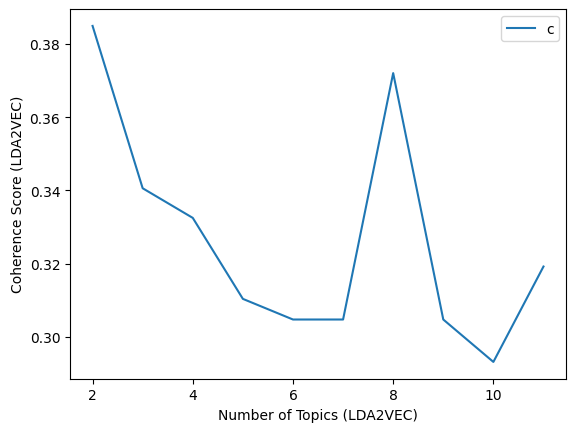

In [22]:
# Write your code here
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()


import re
import numpy as np
import string

nltk.download('punkt')
nltk.download('stopwords')


article_text = """
In recent years, the global conversation surrounding sustainability has intensified, with a growing emphasis on reducing our carbon footprint. The transportation sector, known for its significant contribution to pollution, has seen a surge in the adoption of sustainable mobility solutions. Among these, electric buses, car sharing, and micro-mobility have emerged as key players in reshaping the way we navigate urban landscapes.

Electric Buses: The Backbone of Eco-Friendly Public Transportation

In bustling cities, the hum of traditional buses has been gradually replaced by the whisper of electric buses. These vehicles represent a fundamental shift in public transportation, offering an environmentally friendly alternative to their gas-guzzling counterparts. Electric buses run on rechargeable batteries, emitting zero tailpipe emissions, and reducing noise pollution, making them a promising solution for tackling air quality issues in densely populated areas.

The integration of electric buses into public transportation networks has yielded remarkable results. Not only do they contribute to cleaner air, but they also provide a smoother and quieter ride for passengers. Moreover, with advancements in battery technology, the range and efficiency of electric buses have improved significantly, addressing concerns regarding their operational capabilities and potential limitations.

Car sharing: Driving Towards a Sustainable Future

As urban populations continue to swell, the demand for convenient and cost-effective transportation options has led to the rise of car sharing services. Car sharing programs enable individuals to access vehicles on an as-needed basis, eliminating the need for personal car ownership. By encouraging resource-sharing and reducing the number of cars on the road, these initiatives play a vital role in promoting sustainable mobility.

The benefits of car sharing extend beyond environmental conservation. They include reduced traffic congestion, minimized parking space requirements, and lower overall transportation costs for users. Furthermore, the incorporation of electric or hybrid vehicles within car sharing fleets has further bolstered the sustainability quotient, offering users an eco-friendly alternative for their transportation needs.

Micro-Mobility: Redefining Short-Distance Travel

In bustling city centers, the streets have witnessed the emergence of a new mode of transportation – micro-mobility. This term encompasses various compact and lightweight modes of transport such as electric scooters, bicycles, and even electric skateboards. Designed for short-distance travel, these alternatives provide a convenient and eco-conscious solution for navigating congested urban areas.

The rising popularity of micro-mobility options can be attributed to their accessibility, flexibility, and user-friendly nature. These alternatives provide an effective means of traversing short distances, lessening the dependence on traditional transportation methods for daily commutes. Moreover, their eco-friendly nature resonates with the increasing focus on curbing carbon emissions and fostering sustainable development in urban areas.

The Role of Infrastructure and Policy in Promoting Sustainable Mobility

The effectiveness of sustainable mobility solutions heavily relies on the existence of supportive infrastructure and conducive policies. While the proliferation of these solutions is a positive step, their success is contingent on the presence of appropriate infrastructure and well-designed policies. Developing charging infrastructure for electric buses and vehicles, along with the implementation of dedicated lanes and parking spaces, is vital in promoting the widespread adoption of eco-friendly transportation options.

Furthermore, policy initiatives aimed at incentivizing the use of sustainable mobility solutions, such as tax benefits for electric vehicle users and the integration of car sharing services into urban planning strategies, can significantly influence consumer behavior and encourage the transition towards more sustainable transportation practices.

Challenges and Opportunities on the Horizon

Despite the evident benefits of sustainable mobility solutions, several challenges persist in their widespread implementation. These challenges include the initial costs associated with infrastructure development, the need for continued technological advancements to enhance the efficiency of electric vehicles, and the requirement for comprehensive regulatory frameworks to govern the operations of car sharing and micro-mobility services.

However, these challenges also present an opportunity for innovation and collaboration within the public and private sectors. Investments in research and development, coupled with strategic partnerships between governments, businesses, and communities, can pave the way for the seamless integration of sustainable mobility solutions into the fabric of urban life.

A Sustainable Future in Motion

In an era where the impacts of climate change and environmental decline loom large, the importance of sustainable mobility solutions becomes ever more evident. Embracing the capabilities of electric buses, car sharing, and micro-mobility can enable cities to cultivate a transportation ecosystem that is not only cleaner and more efficient but also more inclusive, benefiting both the environment and the people who inhabit it.

The journey towards sustainable mobility requires a collective effort, with stakeholders across various sectors playing a pivotal role in driving positive change. Through continued innovation, investment, and advocacy, we can pave the way for a future where mobility is not only efficient and accessible but also sustainable and environmentally conscious. Together, we can steer our cities toward a more sustainable and vibrant tomorrow.

Empowering Communities through Education and Engagement

Fostering community empowerment through education and engagement forms the cornerstone of successful sustainable mobility solutions. Educational programs and awareness campaigns are instrumental in cultivating a culture of sustainability, encouraging individuals to make informed choices about their transportation habits. By highlighting the benefits of environmentally friendly alternatives and showcasing their positive impact on the environment, communities can be inspired to actively participate in the transition towards sustainable mobility.

Moreover, community engagement initiatives can serve as a platform for gathering valuable feedback and insights from residents, enabling policymakers and transportation authorities to tailor their strategies and solutions according to the specific needs and preferences of the local populace. By incorporating community input into the planning and development of sustainable mobility projects, cities can ensure that their efforts are not only effective but also inclusive and community-centric.

Looking Ahead: The Evolution of Sustainable Mobility

As technology continues to advance and societal awareness of environmental issues grows, the landscape of sustainable mobility is poised for further evolution. Continued research and development in the fields of electric vehicle technology, battery efficiency, and renewable energy sources are expected to drive significant improvements in the performance and accessibility of sustainable transportation options.

Furthermore, the integration of smart technologies and data-driven solutions holds the potential to optimize the efficiency of public transportation networks, enhance the user experience of car sharing services, and streamline the operations of micro-mobility initiatives. By leveraging the power of data and analytics, cities can make data-driven decisions that lead to more effective and sustainable mobility solutions, ultimately contributing to a cleaner and more resilient urban environment.

In the face of global challenges such as climate change and urbanization, the pursuit of sustainable mobility solutions remains imperative for building a more sustainable and resilient future. By embracing innovation, fostering collaboration, and prioritizing the needs of communities, cities can pave the way for a more sustainable and equitable transportation landscape, where the well-being of both the planet and its inhabitants is placed at the forefront of urban development."""

lda2vec_model = None

def preprocess_text(text):

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


tokens = preprocess_text(article_text)
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

def main():
    limit = 10
    global lda2vec_model
    global optimal_num_topics_lda2vec
    coherence_scores = calculate_coherence_scores(corpus, dictionary, [tokens], limit=limit, start=2, step=1)
    optimal_num_topics, _ = max(coherence_scores, key=lambda x: x[1])
    lda2vec_coherence_values = compute_coherence_values_lda2vec(dictionary, corpus, [tokens], limit=10)
    optimal_num_topics_lda2vec = np.argmax(lda2vec_coherence_values) + 2


    lda2vec_model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics_lda2vec)
    topics = lda2vec_model.show_topics(formatted=False)

    print(f'Optimal number of topics: {optimal_num_topics}')

    for topic_id, topic in topics:
        words = [word for word, weight in topic]
        top_words = ", ".join([f"{word} ({weight:.4f})" for word, weight in topic])
        print(f'Topic {topic_id + 1}: {top_words}')

def compute_coherence_values_lda2vec(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coherence_lda2vec = coherencemodel.get_coherence()
        print('\nCoherence Score (LDA2VE): ', coherence_lda2vec)
    return coherence_values


if __name__ == "__main__":
    main()


lda2vec_topics = lda2vec_model.show_topics(formatted=False)

print(f"Optimal number of topics (LDA2VEC): {optimal_num_topics_lda2vec}")

print(f"Topics (LDA2VEC:")
for topic_id, topic in lsa_topics:
    words = [word for word, _ in topic]
    print(f"Topic (LDA2VEC) {topic_id + 1}: {', '.join(words)}")

# Display
import matplotlib.pyplot as plt

def plot_lda2vec_coherence(corpus, dictionary, texts, start, stop, step):
    lda2vec_coherence_values = compute_coherence_values_lda2vec(dictionary, corpus, texts, stop, start, step)

    x = range(start, stop, step)
    plt.plot(x, lda2vec_coherence_values)
    plt.xlabel("Number of Topics (LDA2VEC)")
    plt.ylabel("Coherence Score (LDA2VEC)")
    plt.legend(("coherence_values (LDA2VEC)"), loc='best')
    plt.show()



start, stop, step = 2, 12, 1
plot_lda2vec_coherence(corpus, dictionary, [tokens], start, stop, step)




## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [28]:
!pip install bertopic
!pip install -U spacy
!pip install spacy
!python -m spacy download en_core_web_sm


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.1/123.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-11-06 03:08:13.605574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 03:08:13.605652: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempt

In [32]:
!pip install bertopic
from bertopic import BERTopic
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Define the documents
documents = [
    "The latest advancements in artificial intelligence are transforming healthcare.",
    "Doctors and researchers are using AI to diagnose diseases more accurately.",
    "AI-powered robots are assisting in surgeries, making them safer and more efficient.",
    "Healthcare providers are adopting telemedicine to provide remote consultations.",
    "Telehealth services are gaining popularity, making healthcare more accessible.",
    "Renewable energy sources such as solar and wind power are reducing our carbon footprint.",
    "Sustainability efforts are driving the adoption of electric vehicles.",
    "Green technologies are creating a more eco-friendly future.",
    "Space exploration is advancing with missions to Mars and beyond.",
    "Aerospace companies are developing reusable rockets for cost-effective space travel.",
    "Cryptocurrencies like Bitcoin are revolutionizing the financial industry.",
    "Blockchain technology is being used for secure and transparent transactions.",
    "Cybersecurity is a growing concern, with an increase in data breaches.",
    "Security measures are being implemented to protect digital assets and information.",
    "Virtual reality is changing the way we experience entertainment and gaming.",
    "VR headsets and immersive experiences are becoming more accessible.",
    "Artificial intelligence is reshaping the way businesses operate.",
    "AI-driven chatbots are enhancing customer support and engagement.",
    "E-commerce platforms are utilizing AI for personalized shopping experiences.",
    "Education is evolving with online learning and digital classrooms.",
    "EdTech companies are providing interactive and adaptive learning solutions."
]

def calculate_coherence_scores(documents, max_k):
    coherence_scores = []
    for k in range(2, max_k + 1):
        topic_model = BERTopic()
        topics, _ = topic_model.fit_transform(documents)

        words_per_topic = [' '.join([str(word) for word in topic]) for topic in topics]  # Convert topics to a list of words

        dictionary = Dictionary([topic.split() for topic in words_per_topic])  # Create the dictionary
        corpus = [dictionary.doc2bow(topic.split()) for topic in words_per_topic]  # Create the corpus

        cm = CoherenceModel(topics=words_per_topic, texts=documents, dictionary=dictionary, coherence='c_v')
        coherence_score = cm.get_coherence()

        coherence_scores.append((k, coherence_score))
        print(f'Coherence Score for {k} topics (c_v): {coherence_score:.4f}')
    return coherence_scores

max_k = 10  # Set the maximum K value
coherence_scores = calculate_coherence_scores(documents, max_k)
optimal_k, _ = max(coherence_scores, key=lambda x: x[1])
print(f'Optimal number of topics: {optimal_k}')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: ignored

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

Considering coherence scores, interpretability, topic diversity, task relevance, and computational resources when comparing topic modeling approaches. Thinking about domain expertise, pre-trained models, contextual data, and optimizing hyperparameters.
The optimal model selection is contingent upon striking a balance between these variables and project-specific needs.

Out of all topic modeling algorithms LDA performed well based on the coherence score i.e., 0.337 which is better whwn compared to LSA, LDA2VEC. The best topic modeling approach to use depends on the unique properties of the data and the objectives of the analysis. But LDA has some benefits that make it a good option in a lot of situations:
Interpretability: The topics offered by LDA are very comprehensible. It makes it simple to comprehend and label topics by allocating a probability distribution of words to each topic.
Proven Track Record: LDA is a well-known and extensively utilized topic modeling algorithm with a solid theoretical base, which makes it a reliable option for a wide range of applications.
Simplicity: When you need a clear-cut and understandable solution, LDA's conceptual simplicity can be helpful.
Scalability: Especially when compared to some contemporary, sophisticated techniques, LDA is computationally efficient and able to handle large datasets.

